In [1]:
import numpy as np
import pandas as pd

C:\Users\Ranjan Yadav\AppData\Local\Temp\ipykernel_16240\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#here we will use inbulit datset fromm scikit learn
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer(as_frame=True)

In [4]:
df = cancer.frame

In [5]:
print("Original Dataset shape : ", df.shape)

Original Dataset shape :  (569, 31)


In [6]:
X = df[cancer['feature_names']]

In [7]:
X_mean = X.mean()

In [8]:
X_std = X.std()

In [9]:
Z = (X - X_mean) / X_std

In [10]:
c = Z.cov()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(c)

In [12]:
print("Eigen values:\n", eigenvalues)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


In [13]:
eigenvalues,eigenvectors = np.linalg.eig(c)

In [14]:
print("Eigen values shape:\n", eigenvalues.shape)
print("Eigen vector shape:\n", eigenvectors.shape)

Eigen values shape:
 (30,)
Eigen vector shape:
 (30, 30)


In [15]:
idx = eigenvalues.argsort()[::-1]

In [16]:
eigenvalues = eigenvalues[idx]

In [17]:
eigenvectors = eigenvectors[:,idx]

In [18]:
n_components =5

In [19]:
u=eigenvectors[:,:n_components]
pca_component=pd.DataFrame(u,index=cancer['feature_names'],columns=['PC1','PC2', 'PC3', 'PC4', 'PC5'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

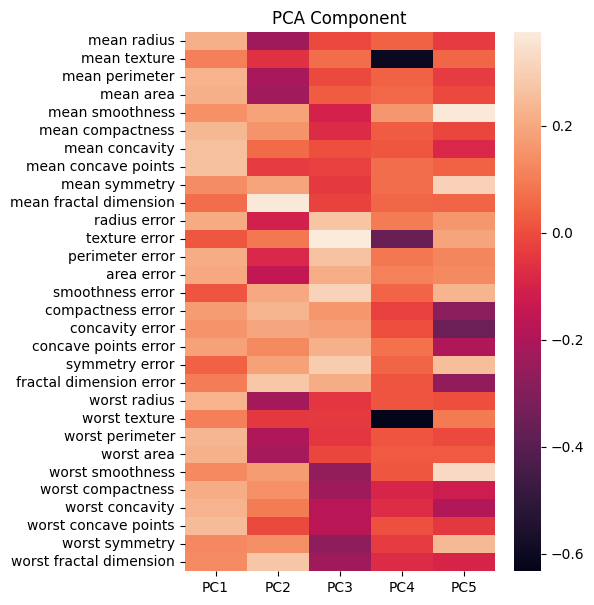

In [21]:
plt.figure(figsize=(5,7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [27]:
X = data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test==scaler.transform(X_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
X_train

array([[ 0.93490529,  0.06094652,  0.9319501 , ...,  0.48981534,
        -0.2324988 , -0.96597731],
       [ 0.11481454, -0.37872986,  0.21108599, ...,  0.0983721 ,
        -0.70697856, -0.58596948],
       [ 0.75917155,  0.83038019, -0.14934606, ..., -1.14119816,
        -0.35111874, -0.20596166],
       ...,
       [ 0.40770409, -0.7634467 ,  0.67449863, ..., -0.74975492,
         1.01301057,  0.45905203],
       [ 0.40770409, -0.48864896,  1.13791127, ..., -0.5540333 ,
        -0.46973868, -1.15598122],
       [ 0.466282  ,  0.610542  , -0.20083636, ..., -0.2278306 ,
        -0.41042871, -0.68097144]])

In [31]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train =pca.fit_transform(X_train)

In [32]:
X_train.shape

(1276, 5)

In [33]:
X_test = pca.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=model.predict(X_test)

In [36]:
matrix = confusion_matrix(y_test, y_pred)

In [37]:
matrix

array([[ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  6,  0,  4,  0],
       [ 0,  0, 98,  2, 31,  0],
       [ 0,  0, 99,  0, 44,  0],
       [ 0,  0, 22,  0, 12,  0],
       [ 0,  0,  1,  0,  0,  0]], dtype=int64)

In [38]:
print("Accuracy : ",accuracy_score(y_test, y_pred) *100)

Accuracy :  34.375


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.43      0.75      0.55       131
           6       0.00      0.00      0.00       143
           7       0.13      0.35      0.19        34
           8       0.00      0.00      0.00         1

    accuracy                           0.34       320
   macro avg       0.09      0.18      0.12       320
weighted avg       0.19      0.34      0.24       320



c:\Users\Ranjan Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ranjan Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ranjan Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  